### Dataset Description

A team collected data on email messages to create a classifier that can separate spam 
from non-spam email messages.  

In [1]:
#importing the required libraries 
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
from dmba import classificationSummary
from dmba import liftChart, gainsChart

In [4]:
spam_df=pd.read_csv('Spambase.csv')
spam_df.head()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spam_yes = spam_df[spam_df['Spam'] == 1]
spam_no = spam_df[spam_df['Spam'] == 0]

In [6]:
spam_df.Spam.value_counts()

0    2788
1    1813
Name: Spam, dtype: int64

### Q1

 Examine how each predictor differs between the spam and non-spam e-mails by comparing the spam-class average and non-spam-class average.  Identify 10 predictors for which the difference between the spam-class average and the non-spam class average is the highest.   

In [7]:
spamyes_avg = spam_yes.loc[ : , spam_yes.columns != 'Spam'].mean()
spamno_avg = spam_no.loc[ : , spam_no.columns != 'Spam'].mean()

print(spamyes_avg - spamno_avg)


make            0.078859
address        -0.079816
all             0.203214
W_3d            0.163786
our             0.332915
over            0.130331
remove          0.266022
internet        0.169727
order           0.132012
mail            0.183337
receive         0.096723
will            0.013649
people          0.081882
report          0.041171
addresses       0.103762
free            0.444775
business        0.239160
email           0.221936
you             0.994199
credit          0.197942
your            0.941668
font            0.192810
W_000           0.239967
money           0.195741
hp             -0.877994
hpl            -0.422822
george         -1.263716
W_650          -0.175008
lab            -0.162110
labs           -0.159886
telnet         -0.104759
W_857          -0.076788
data           -0.136425
W_415          -0.076011
W_85           -0.162527
technology     -0.112157
W_1999         -0.154275
parts          -0.014013
pm             -0.109252
direct         -0.046399


In [8]:
diff_df=abs((spamyes_avg - spamno_avg)).nlargest(n=10)
diff_df

CAP_tot     309.148468
CAP_long     86.178780
CAP_avg       7.141864
george        1.263716
you           0.994199
your          0.941668
hp            0.877994
free          0.444775
hpl           0.422822
C!            0.403729
dtype: float64

### Response 1

The top ten predictors with the highest difference between the spam-class average and the non-spam class average are CAP_tot, CAP_long, CAP_avg, george, you, your, hp, free, hpl, and C!.

### Q2

 Among those predictors, which words or signs appear more often in spam emails? 

In [9]:
spamyes_avg.nlargest(n=10).round(0)

CAP_tot     471.0
CAP_long    104.0
CAP_avg      10.0
you           2.0
your          1.0
will          1.0
free          1.0
our           1.0
C!            1.0
all           0.0
dtype: float64

In [10]:
spamno_avg.nlargest(n=10).round(0)

CAP_tot     161.0
CAP_long     18.0
CAP_avg       2.0
you           1.0
george        1.0
hp            1.0
will          1.0
your          0.0
hpl           0.0
re:           0.0
dtype: float64

### Response 2

The words that appeared more often in spam mails are CAP_tot(471),
CAP_long(104),CAP_avg(10),you(2),your(1),will(1),free(1)our(1),C!(1),all(0).

### Q3

 Perform a linear discriminant analysis using the training dataset (60 percent of observations in the original dataset.Include only 10 predictors identified in the question above in the LDA model.

In [11]:
print (diff_df.index)


Index(['CAP_tot', 'CAP_long', 'CAP_avg', 'george', 'you ', 'your', 'hp',
       'free', 'hpl', 'C!'],
      dtype='object')


In [12]:
diff_columns = (diff_df.index)
predictors = [col for col in spam_df.columns if col in diff_columns]
y = spam_df.Spam
X = spam_df[predictors]
X_train,X_valid,y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=123)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
X_train

,free,you,your,hp,hpl,george,C!,CAP_avg,CAP_long,CAP_tot
501,0.00,0.00,0.00,0.0,0.0,0.00,0.408,4.100,25,82
1262,0.00,1.76,2.20,0.0,0.0,0.00,0.444,2.413,16,140
1846,0.00,3.18,0.00,0.0,0.0,0.00,0.000,2.510,12,123
4295,0.00,4.95,0.99,0.0,0.0,0.00,0.000,1.222,4,22
1815,0.00,0.00,0.00,0.0,0.0,33.33,0.000,1.000,1,3
...,...,...,...,...,...,...,...,...,...,...
1593,1.85,1.85,0.00,0.0,0.0,0.00,3.768,4.833,29,87
4060,0.00,0.00,0.00,0.0,0.0,0.00,0.943,2.166,5,13
1346,0.61,4.55,1.72,0.0,0.0,0.00,0.104,3.705,54,478
3454,0.00,0.00,0.00,0.0,0.0,0.00,0.000,2.444,76,198


In [14]:
y_train

501     1
1262    1
1846    0
4295    0
1815    0
       ..
1593    1
4060    0
1346    1
3454    0
3582    0
Name: Spam, Length: 2760, dtype: int64

### Q4

What are the coefficients of linear discriminants?  How are these coefficients used in your LDA analysis? 


In [15]:
print('Coefficients and intercept')
ct = pd.DataFrame([lda.intercept_], index=['Intercept'])
ct = ct.append(pd.DataFrame(lda.coef_.transpose(), index=list(diff_df.index)[:]))
print(ct)

Coefficients and intercept
                  0
Intercept -2.168507
CAP_tot    0.978457
CAP_long   0.146852
CAP_avg    0.730680
george    -0.218598
you       -0.242282
your      -0.084557
hp         1.186661
free       0.002906
hpl        0.000567
C!         0.000952


### Response 4

Linear discriminant coefficients-The LDA decision rule is formed using a linear combination of predictor variables.The coefficient of linear discriminants are CAP_tot(0.98),CAP_long(0.15),CAP_avg(0.73),george(-0.22),you(-0.24),your(-0.08),hp(1.19),free(0.003,hpl(0.0006),C!(0.001).
A negative coefficient would be interpreted as indicating that, when the other independent variables are held constant, and increase in the independent variables of interest would mean that the discriminant function score for a case is predicted to decrease vice versa.

### Q5

How many linear discriminants (functions) are in the model?  Why? 

In [24]:
ldf=pd.DataFrame(lda.decision_function(X_train)).rename(columns ={'0': 'Score'})
ldf

,0
0,-1.580171
1,0.373723
2,-1.570295
3,-0.691449
4,-4.980465
...,...
2755,4.497989
2756,-1.027976
2757,0.973265
2758,-1.929755


### Response 5

Discriminant Function-Discriminant analysis works by creating one or more linear combinations of predictors, creating a new latent variable for each function. As there are only 2 groups(spam or non-spam)so we get only 1 Discriminant function.


### Q6

Generate linear discriminants scores using your model.  How are they used in classifying spams and non-spams? 

In [25]:
result = pd.concat([
    pd.DataFrame({'Classification': lda.predict(X_train),
                  'Actual': y_train}),
    pd.DataFrame(lda.decision_function(X_train), 
                 columns=['Score ']),
    pd.DataFrame(lda.predict_proba(X_train),columns=['Propensity {}'.format(cls) for cls in lda.classes_])], axis=1)

pd.set_option('precision',2)
print(result.sample(10))

      Classification  Actual  Score   Propensity 0  Propensity 1
2319             NaN     NaN    0.16          0.46          0.54
3550             0.0     0.0     NaN           NaN           NaN
1284             NaN     NaN   -1.35          0.79          0.21
3854             0.0     0.0     NaN           NaN           NaN
472              NaN     NaN   -1.99          0.88          0.12
1552             1.0     1.0   -2.98          0.95          0.05
582              NaN     NaN   -3.83          0.98          0.02
3260             0.0     0.0     NaN           NaN           NaN
1085             1.0     1.0   -0.19          0.55          0.45
2818             0.0     0.0     NaN           NaN           NaN


### Response 6

The discriminant score is obtained by sum of the coefficient to the observation values and the intercept.
If the discriminant score is positive, the observation is classified as spam.
If the discriminant score is negative, the observation is classified as non-spam.

### Q7

 Generate confusion matrix using the validation data. Comment on the usefulness of the model based on the results from the confusion matrix. 

Spam-> 1

Non-Spam-> 0


In [ ]:
classificationSummary(y_valid,lda.predict(X_valid),class_names=lda.classes_)

Confusion Matrix (Accuracy 0.8169)

       Prediction
Actual    0    1
     0 1000   93
     1  244  504


### Response 7

According to above confusion matrix, 1000 of the 1841 entries were accurately identified as spam, while 503 were successfully identified as non-spam. A total of 1503 observations out of 1841 observations are properly identified, with an accuracy of 81.69 percent. This indicates that the model was effective in determining the classes for the validation data and implemented.

### Q8

 Generate lift and decile charts using the validation data. Comment on the usefulness of the model based on the results from these charts. 

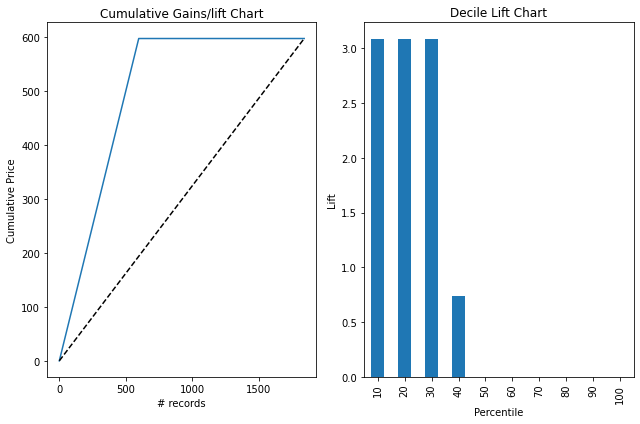

In [ ]:
pred_v = pd.Series(lda.predict(X_valid))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9, 6)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains/lift Chart')

ax = liftChart(pred_v, ax=axes[1], labelBars=False )
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()


### Response 8

In the above Gains/lift chart, the difference between the dashed lines and the blue line is significant higher, we conclude that our model is good. 

In the above Decile chart, there is a no decrease in chart so we cannot conclude that our model is good.